## Install Dependencies

In [1]:
# %pip install earthengine-api -q
# %pip install git+https://github.com/cordmaur/GEES2Downloader.git@main -q
# %pip install geemap -q
# %pip install stackstac

In [2]:
# For memory tracking

# %pip install pympler

# from IPython.display import clear_output

# from pympler.tracker import SummaryTracker
# # from pympler.classtracker import ClassTracker
# tracker = SummaryTracker()
# # tr = ClassTracker()

# tracker.print_diff()

In [3]:
import os

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import ee
import matplotlib.pyplot as plt
from pathlib import Path

import xarray as xr
import rasterio as rio

from waterdetect.engine import search_tiles, WaterDetect, open_image
from waterdetect.cloudless import get_gee_img

In [6]:
# ee.Authenticate()

In [7]:
ee.Initialize()

# Getting the Images to be Processed

In [8]:
tiles = search_tiles('22KFV', '2019-10')
tiles

[<Item id=S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719>,
 <Item id=S2B_MSIL2A_20191027T132239_R038_T22KFV_20201004T065003>,
 <Item id=S2A_MSIL2A_20191025T133231_R081_T22KFV_20201004T060431>,
 <Item id=S2A_MSIL2A_20191022T132241_R038_T22KFV_20201004T045948>,
 <Item id=S2B_MSIL2A_20191020T133229_R081_T22KFV_20201004T042823>,
 <Item id=S2B_MSIL2A_20191017T132239_R038_T22KFV_20201004T032642>,
 <Item id=S2A_MSIL2A_20191015T133231_R081_T22KFV_20201004T023230>,
 <Item id=S2A_MSIL2A_20191012T132241_R038_T22KFV_20201004T012531>,
 <Item id=S2B_MSIL2A_20191010T133229_R081_T22KFV_20201004T005150>,
 <Item id=S2B_MSIL2A_20191007T132239_R038_T22KFV_20201003T234537>,
 <Item id=S2A_MSIL2A_20191005T133231_R081_T22KFV_20201003T224936>,
 <Item id=S2A_MSIL2A_20191002T132241_R038_T22KFV_20201003T214143>]

## Download Images from PC

In [9]:
from waterdetect.glint import DWGlintProcessor
from concurrent.futures import ThreadPoolExecutor
img_item = tiles[0]
out_shape = (10980, 10980)
bands = WaterDetect.load_bands
#bands=['B02', 'B12', 'B11']

In [11]:
%time img = open_image(tiles[0], bands=bands, n_jobs=3)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
Finished downloading. Will reshape in parallel...
resampling B11 to (10980, 10980)
resampling B12 to (10980, 10980)
resampling SCL to (10980, 10980)
CPU times: total: 51.7 s
Wall time: 55 s


In [11]:
# img.rio

In [12]:



executor = ThreadPoolExecutor(max_workers=2)
# load_clouds = executor.submit(self.get_s2cloudmask)
load_dataset = executor.submit(open_image, image=img_item, out_shape=out_shape, bands=bands, n_jobs=2)
glint_proc = executor.submit(DWGlintProcessor, img_item=img_item)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
Getting metadata: granule-metadata


D:\git_projects\pc_waterdetect\waterdetect\glint.py:54: RuntimeWarning: Mean of empty slice
  return np.nanmean(arrays_lst, axis=0)
C:\ProgramData\Anaconda3\envs\planetary3\lib\site-packages\rioxarray\_io.py:841: RuntimeWarning: Mean of empty slice
  warnings.warn(str(rio_warning.message), type(rio_warning.message))


In [13]:
glint_proc

<Future at 0x1aaa2139520 state=finished returned DWGlintProcessor>

In [14]:
load_dataset.exception()

Finished downloading. Will reshape in parallel...
resampling B11 to (10980, 10980)
resampling B12 to (10980, 10980)
resampling SCL to (10980, 10980)


In [34]:
from joblib import Parallel, delayed

In [ ]:
Parallel?

In [15]:
self = WaterDetect(tiles[0], ['mndwi', 'ndwi', 'B12'], s2clouds=True, n_jobs=10)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
Retrieving band info
Dividing band in 4 tiles


Tiles:   0%|          | 0/4 [00:00<?, ?tile/s]

Tile[0:2896,0:2896]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[2896:5490,0:2896]:   0%|          | 0.00/9.77M [00:00<?, ?b/s]

Tile[0:2896,2896:5490]:   0%|          | 0.00/9.77M [00:00<?, ?b/s]

Tile[2896:5490,2896:5490]:   0%|          | 0.00/8.75M [00:00<?, ?b/s]

Finished downloading. Will reshape in parallel...
resampling B11 to (10980, 10980)
resampling B12 to (10980, 10980)
resampling SCL to (10980, 10980)
Getting metadata: granule-metadata


D:\git_projects\pc_waterdetect\waterdetect\glint.py:54: RuntimeWarning: Mean of empty slice
  return np.nanmean(arrays_lst, axis=0)


Finished. The result can be accessed at obj.array
<Future at 0x1aaa212ceb0 state=finished returned DWGlintProcessor>
<Future at 0x1aaa2150910 state=finished returned Dataset>
<Future at 0x1aaa21509d0 state=finished returned ndarray>
Calculating indices


In [16]:
%time self.run_detect_water()

k=2 - Calinski=23.792457187629456
k=3 - Calinski=2214.633740271281
k=4 - Calinski=1523.4436352198718
k=5 - Calinski=1145.5205505823965
k=6 - Calinski=918.528196427788
k=7 - Calinski=4439.0287495278235
Final clustering with k=7


D:\git_projects\pc_waterdetect\waterdetect\engine.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([mean, std, count])
D:\git_projects\pc_waterdetect\waterdetect\engine.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([mean, std, count])
D:\git_projects\pc_waterdetect\waterdetect\engine.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([mean, std, count])
D:\git_projects\pc_waterdetect\waterdetect\engine.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([mean, std, count])
D:\git_projects\pc_waterdetect\waterdetect\engine.py:160: FutureWarning: The frame.appen

Water cluster = 2
Generalized for the whole scene
CPU times: total: 45.5 s
Wall time: 58.8 s


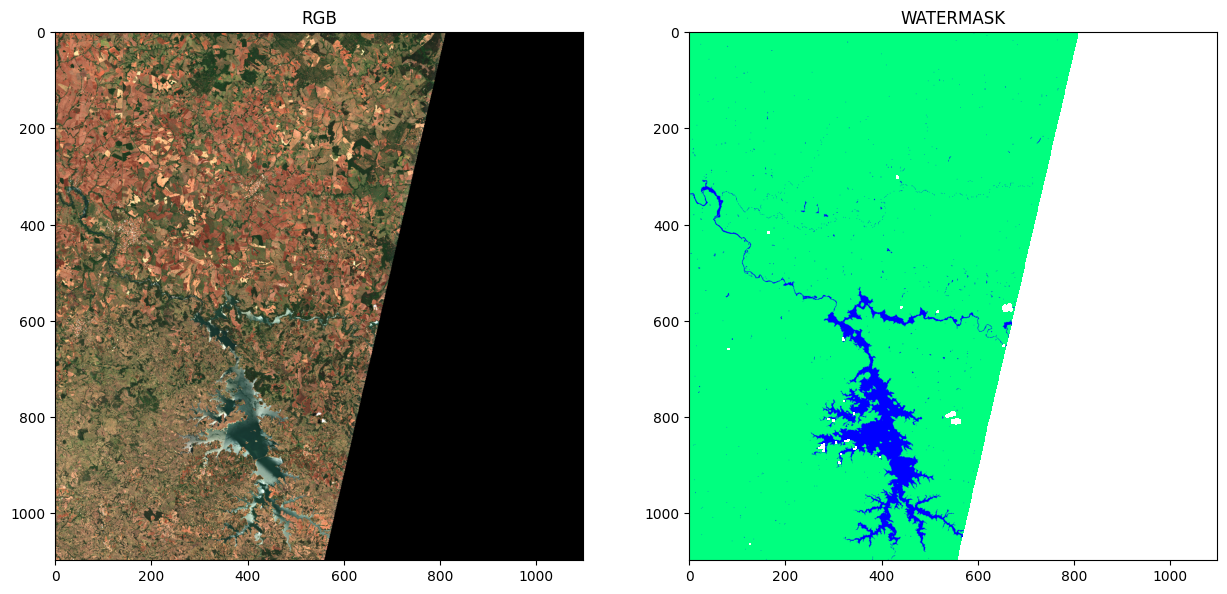

In [18]:
self.plot_thumbs(thumbs=['rgb', 'watermask'])

In [9]:
import planetary_computer as pc
from waterdetect.cloudless import *
# import stackstac

In [10]:
tile = tiles[0]

In [11]:
gee_img = get_gee_img(tile)

In [12]:
from geeS2downloader import GEES2Downloader

In [13]:
downloader = GEES2Downloader()

In [14]:
downloader.download(gee_img, 'probability')

Retrieving band info
Dividing band in 16 tiles


Tiles:   0%|          | 0/16 [00:00<?, ?tile/s]

Tile[0:2896,0:2896]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[0:2896,2896:5792]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[2896:5792,0:2896]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[0:2896,5792:8688]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[0:2896,8688:10980]:   0%|          | 0.00/8.63M [00:00<?, ?b/s]

Tile[2896:5792,2896:5792]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[2896:5792,5792:8688]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[2896:5792,8688:10980]:   0%|          | 0.00/8.63M [00:00<?, ?b/s]

Tile[5792:8688,0:2896]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[5792:8688,2896:5792]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[5792:8688,5792:8688]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[5792:8688,8688:10980]:   0%|          | 0.00/8.63M [00:00<?, ?b/s]

Tile[8688:10980,0:2896]:   0%|          | 0.00/8.63M [00:00<?, ?b/s]

Tile[8688:10980,2896:5792]:   0%|          | 0.00/8.63M [00:00<?, ?b/s]

Tile[8688:10980,5792:8688]:   0%|          | 0.00/8.63M [00:00<?, ?b/s]

Tile[8688:10980,8688:10980]:   0%|          | 0.00/6.83M [00:00<?, ?b/s]

Finished. The result can be accessed at obj.array


In [ ]:
WaterDetect(tiles[0], ['mndwi', 'ndwi', 'B12'], s2clouds=True, n_jobs=10)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
Retrieving band info
Dividing band in 4 tiles


Tiles:   0%|          | 0/4 [00:00<?, ?tile/s]

Tile[0:2896,0:2896]:   0%|          | 0.00/10.9M [00:00<?, ?b/s]

Tile[0:2896,2896:5490]:   0%|          | 0.00/9.77M [00:00<?, ?b/s]

Tile[2896:5490,0:2896]:   0%|          | 0.00/9.77M [00:00<?, ?b/s]

Tile[2896:5490,2896:5490]:   0%|          | 0.00/8.75M [00:00<?, ?b/s]

Finished. The result can be accessed at obj.array
Getting metadata: granule-metadata


D:\git_projects\pc_waterdetect\waterdetect\glint.py:54: RuntimeWarning: Mean of empty slice
  return np.nanmean(arrays_lst, axis=0)


In [11]:
import rasterio as rio

import rioxarray as xrio
from joblib import Parallel, delayed

def reshape(array, out_shape):
    return array.rio.reproject(array.rio.crs, shape=out_shape, resampling=rio.enums.Resampling.nearest)

def open_image(image, bands, out_shape=(10980, 10980), n_jobs=4):
    '''Open bands of an image and output them as a cube XArray with the desired out_shape'''
    
    print(f'Getting image: {image.id}')
    # sign the assets from the image
    assets = {band: pc.sign(image.assets[band].href) for band in bands}
    
    print('passou aqui')
    # open the datasets (bands)
    datasets = {band: xrio.open_rasterio(asset).squeeze() for band, asset in assets.items()}
    
    # rescale
    for band in datasets:
        if band != 'SCL':
            datasets[band] = (datasets[band]/10000).astype('float32')

    print('recalculou as bandas')
    # get the arrays to reshape
    reshape_arrays = {band: array for band, array in datasets.items() if array.shape != out_shape}
    
    print('so falta em paralelo')
    reshaped_arrays = Parallel(n_jobs)(delayed(reshape)(reshape_array, out_shape) for reshape_array in reshape_arrays.values())
    for band, reshaped in zip(reshape_arrays.keys(), reshaped_arrays):
        print(f'resampling {band} to {out_shape}')
        datasets[band] = reshaped

In [12]:
from waterdetect.glint import DWGlintProcessor
from concurrent.futures import ThreadPoolExecutor
img_item = tile
out_shape = (10980, 10980)
executor = ThreadPoolExecutor(max_workers=2)
# load_clouds = executor.submit(self.get_s2cloudmask)
load_dataset = executor.submit(open_image, image=img_item, out_shape=out_shape, bands=['B02', 'B12'], n_jobs=5)
glint_proc = executor.submit(DWGlintProcessor, img_item=img_item)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
Getting metadata: granule-metadata
passou aqui


C:\ProgramData\Anaconda3\envs\planetary3\lib\site-packages\rioxarray\_io.py:841: RuntimeWarning: Mean of empty slice
  warnings.warn(str(rio_warning.message), type(rio_warning.message))


In [13]:
glint_proc

<Future at 0x153d9bf2370 state=finished returned DWGlintProcessor>

In [14]:
load_dataset.exception()

recalculou as bandas
so falta em paralelo


AttributeError("'DataArray' object has no attribute 'rio'")

In [21]:
%pip install cpickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cpickle (from versions: none)
ERROR: No matching distribution found for cpickle


In [20]:
%pip install dill

Note: you may need to restart the kernel to use updated packages.


In [22]:
signed = pc.sign(tile).to_dict()

In [25]:
img = stackstac.stack(items=[signed],
                      # bounds=tile.bbox,
                      resolution=10, 
                      chunksize=4096,
                      assets=['B02', 'SCL'],
                      epsg=tile.properties['proj:epsg']
                     )

In [ ]:
arr = img.values

In [11]:
%time img = open_image(tiles[0], ['B03', 'SCL', 'B12', 'B11'], n_jobs=1)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
resampling SCL to (10980, 10980)
resampling B12 to (10980, 10980)
resampling B11 to (10980, 10980)
CPU times: total: 30.2 s
Wall time: 40.2 s


In [15]:
%time img = open_image(tiles[0], ['B02', 'SCL', 'B12', 'B11'], n_jobs=4)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
resampling SCL to (10980, 10980)
resampling B12 to (10980, 10980)
resampling B11 to (10980, 10980)
Wall time: 1min 2s


In [16]:
%time img = open_image(tiles[0], ['B04', 'SCL', 'B12', 'B11'], n_jobs=4)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
resampling SCL to (10980, 10980)
resampling B12 to (10980, 10980)
resampling B11 to (10980, 10980)
Wall time: 56.6 s


In [17]:
%time img = open_image(tiles[0], ['B08', 'SCL', 'B12', 'B11'], n_jobs=1)

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
resampling SCL to (10980, 10980)
resampling B12 to (10980, 10980)
resampling B11 to (10980, 10980)
Wall time: 1min 2s


In [18]:
tile.properties

{'datetime': '2019-10-30T13:32:29.024000Z',
 'platform': 'Sentinel-2B',
 'proj:epsg': 32722,
 'instruments': ['msi'],
 's2:mgrs_tile': '22KFV',
 'constellation': 'Sentinel 2',
 's2:granule_id': 'S2B_OPER_MSI_L2A_TL_ESRI_20201004T074726_A013835_T22KFV_N02.12',
 'eo:cloud_cover': 0.189204,
 's2:datatake_id': 'GS2B_20191030T133229_013835_N02.12',
 's2:product_uri': 'S2B_MSIL2A_20191030T133229_N0212_R081_T22KFV_20201004T074719.SAFE',
 's2:datastrip_id': 'S2B_OPER_MSI_L2A_DS_ESRI_20201004T074726_S20191030T133225_N02.12',
 's2:product_type': 'S2MSI2A',
 'sat:orbit_state': 'descending',
 's2:datatake_type': 'INS-NOBS',
 's2:generation_time': '2020-10-04T07:47:19.691Z',
 'sat:relative_orbit': 81,
 's2:water_percentage': 4.268145,
 's2:mean_solar_zenith': 21.7022994294368,
 's2:mean_solar_azimuth': 68.2506169194091,
 's2:processing_baseline': '02.12',
 's2:snow_ice_percentage': 0.0,
 's2:vegetation_percentage': 51.006758,
 's2:thin_cirrus_percentage': 0.002517,
 's2:cloud_shadow_percentage': 0.

In [10]:
import rioxarray as xrio
from waterdetect.engine import *

In [79]:
image = tiles[-1]
bands = ['B02', 'B12', 'B03']
out_shape = (10980, 10980)

In [80]:
assets = {band: pc.sign(image.assets[band].href) for band in bands}

In [81]:
datasets = {band: xrio.open_rasterio(asset).squeeze() for band, asset in assets.items()}

In [ ]:
%time datasets['B03'].values

In [1]:
from datetime import datetime, timedelta
from joblib import Parallel, delayed
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [88]:
start = datetime.now()
for band in datasets:
    if band != 'SCL':
        datasets[band] = (datasets[band]/10000).astype('float32')
        
print(datetime.now() - start)

0:01:19.709091


In [82]:
from time import sleep 
def rescale(b):
    print(f'Rescaling {b.shape}')
    x = (b/10000).astype('float32')
    print(f'Finished shape {x.shape} at {datetime.now()}')
    return x

def wait(secs):
    sleep(secs)
    print(f'Waited for {secs}secs')
    return f'Waited for {secs}secs'

In [40]:
pool = ThreadPoolExecutor(max_workers=3)

w1 = pool.submit(wait, 5)
w2 = pool.submit(wait, 10)

pool.shutdown()

Waited for 5secs
Waited for 10secs


In [41]:
w1

<Future at 0x226360ac190 state=finished returned str>

In [35]:
w2.result()

Waited for 5secs
Waited for 10secs


'Waited for 10secs'

In [83]:
start = datetime.now()

pool = ThreadPoolExecutor(max_workers=3)

b2 = pool.submit(rescale, datasets[bands[0]])
b12 = pool.submit(rescale, datasets[bands[1]])
b3 = pool.submit(rescale, datasets[bands[2]])

# pool.shutdown()
print(datetime.now() - start)

Rescaling (10980, 10980)
Rescaling (5490, 5490)
Rescaling (10980, 10980)
0:00:00.008005


In [87]:
b2

<Future at 0x22636392f10 state=finished returned DataArray>

In [88]:
b3

<Future at 0x22636047d30 state=running>

In [89]:
b12 

<Future at 0x2264ed93760 state=running>

Finished shape (5490, 5490) at 2022-01-28 20:00:40.894338
Finished shape (10980, 10980) at 2022-01-28 20:01:26.178212


In [19]:
ThreadPoolExecutor?

Init signature:
ThreadPoolExecutor(
    max_workers=None,
    thread_name_prefix='',
    initializer=None,
    initargs=(),
)
Docstring:      This is an abstract base class for concrete asynchronous executors.
Init docstring:
Initializes a new ThreadPoolExecutor instance.

Args:
    max_workers: The maximum number of threads that can be used to
        execute the given calls.
    thread_name_prefix: An optional name prefix to give our threads.
    initializer: A callable used to initialize worker threads.
    initargs: A tuple of arguments to pass to the initializer.
File:           d:\programs\miniconda3\envs\planetary\lib\concurrent\futures\thread.py
Type:           type
Subclasses:     


In [28]:
start = datetime.now()

with ThreadPoolExecutor(max_workers=3) as executor:
    b2 = executor.submit(rescale, datasets[bands[0]])
    b12 = executor.submit(rescale, datasets[bands[1]])
    b3 = executor.submit(rescale, datasets[bands[2]])
    


print(datetime.now() - start)

Rescaling <xarray.DataArray (y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
    band         int32 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ... 7.39e+06 7.39e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
Rescaling <xarray.DataArray (y: 5490, x: 5490)>
[30140100 values with dtype=uint16]
Coordinates:
    band         int32 1
  * x            (x) float64 6e+05 6e+05 6.000e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ... 7.39e+06 7.39e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
Rescaling <xarray.DataArray (y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
    band         int32 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ... 7.39e+06 7.39e+06


In [27]:
b2.exception()

concurrent.futures.process.BrokenProcessPool('A process in the process pool was terminated abruptly while the future was running or pending.')

In [100]:
f = futures[0]

TypeError("'dict' object is not callable")

{'B02': <xarray.DataArray (y: 10980, x: 10980)>
 [120560400 values with dtype=uint16]
 Coordinates:
     band         int32 1
   * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
   * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ... 7.39e+06 7.39e+06
     spatial_ref  int32 0
 Attributes:
     scale_factor:  1.0
     add_offset:    0.0,
 'B12': <xarray.DataArray (y: 5490, x: 5490)>
 [30140100 values with dtype=uint16]
 Coordinates:
     band         int32 1
   * x            (x) float64 6e+05 6e+05 6.000e+05 ... 7.098e+05 7.098e+05
   * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ... 7.39e+06 7.39e+06
     spatial_ref  int32 0
 Attributes:
     scale_factor:  1.0
     add_offset:    0.0,
 'B03': <xarray.DataArray (y: 10980, x: 10980)>
 [120560400 values with dtype=uint16]
 Coordinates:
     band         int32 1
   * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
   * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ...

In [94]:
start = datetime.now()

rescaled = Parallel(n_jobs=3)(delayed(rescale)(datasets, band) for band in bands)

print(datetime.now() - start)

PicklingError: Could not pickle the task to send it to the workers.

In [72]:
datasets['B12'][0,0]

<xarray.DataArray ()>
array(0.2396, dtype=float32)
Coordinates:
    band         int32 1
    x            float64 6e+05
    y            float64 7.5e+06
    spatial_ref  int32 0

In [59]:
%time reshape(datasets['B12'], out_shape)

Wall time: 7.05 s


<xarray.DataArray (y: 10980, x: 10980)>
array([[2.5600002e-33, 2.5600002e-33, 2.6450000e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5600002e-33, 2.5600002e-33, 2.6450000e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5879996e-33, 2.5879996e-33, 2.5780002e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.3349998e-33, 3.3349998e-33, 3.1000001e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2030002e-33, 3.2030002e-33, 3.0949999e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2030002e-33, 3.2030002e-33, 3.0949999e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 7.5e+06 7.5e+06 7.5e+06 ... 7.39e+06 7.39e+06
    band         int32 1
    spatial_ref  int32 0
Attributes:
    _FillValue:  3.402823466e+38

In [12]:
tile.bbox

[-50.02707, -23.595262326390323, -49.237976, -22.596140518501876]

In [36]:
%time img = open_image(tiles[0], ['B02', 'SCL'])

Getting image: S2B_MSIL2A_20191030T133229_R081_T22KFV_20201004T074719
resampling SCL to (10980, 10980)
Wall time: 44.3 s


## Process the Images

In [ ]:
import gc

cluster_bands = ['mndwi', 'ndwi', 'B12']

for tile in tiles:
    clear_output()
    tracker.print_diff()
    
    print('*'*100)
    print(f'Processing tile {tile}')
    wd = WaterDetect(tile, cluster_bands, s2clouds=True, n_jobs=4)
    wd.run_detect_water()
    
    # save thumbnails
    wd.plot_thumbs(cols=3, thumbs=['rgb', 'watermask', 'mndwi', 'mask', 'glint', 'ndwi'],  save_folder='../tmp2')
    
    # save graphs
    wd.plot_graphs([['ndwi', 'mndwi'], ['B12', 'mndwi']], cols=2, save_folder='../tmp2')
    
    # save the watermask
    wd.save_geotiff('nodata_watermask', Path('../tmp2')/f'{wd.img_item.id[:38]}_watermask.tif')
    
    del wd
    gc.collect()

                                            types |   # objects |   total size
================================================= | =========== | ============
                        numpy.ma.core.MaskedArray |          12 |     23.00 MB
                                    numpy.ndarray |        5514 |      9.96 MB
                                             dict |       19298 |      5.67 MB
                              function (<lambda>) |        4970 |    660.08 KB
                       builtin_function_or_method |        5476 |    385.03 KB
                                          weakref |        4978 |    350.02 KB
                                              set |        1607 |    340.98 KB
                                            tuple |        5745 |    311.16 KB
                                              int |        9928 |    310.25 KB
                                             list |        3989 |    245.82 KB
                                  itertools.count | 

Tiles:   0%|          | 0/4 [00:00<?, ?tile/s]

resampling B11 to (10980, 10980)
resampling B12 to (10980, 10980)
resampling SCL to (10980, 10980)
Getting metadata: granule-metadata


/home/jovyan/pc_waterdetect/waterdetect/glint.py:54: RuntimeWarning: Mean of empty slice
  return np.nanmean(arrays_lst, axis=0)


In [ ]:
tiles = search_tiles('23KLT', '2019-01/2019-12')
tiles

In [ ]:
import gc

cluster_bands = ['mndwi', 'ndwi', 'B12']

for tile in tiles:
    print('*'*100)
    print(f'Processing tile {tile}')
    wd = WaterDetect(tile, cluster_bands, s2clouds=True, n_jobs=4)
    wd.run_detect_water()
    
    # save thumbnails
    wd.plot_thumbs(cols=3, thumbs=['rgb', 'watermask', 'mndwi', 'mask', 'glint', 'ndwi'],  save_folder='../tmp2')
    
    # save graphs
    wd.plot_graphs([['ndwi', 'mndwi'], ['B12', 'mndwi']], cols=2, save_folder='../tmp2')
    
    # save the watermask
    wd.save_geotiff('nodata_watermask', Path('../tmp2')/f'{wd.img_item.id[:38]}_watermask.tif')
    
    del wd
    gc.collect()